In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [3]:
data = np.loadtxt('data.dat')

n = len(data)

indices = np.arange(n)
Even = (indices%2) == 0
print(Even)

[ True False  True ... False  True False]


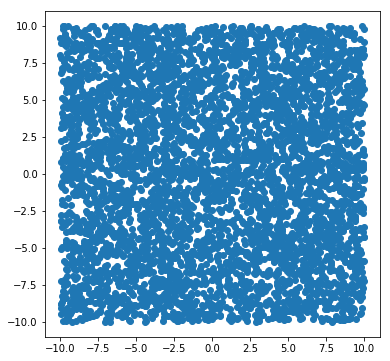

In [8]:
fig = plt.figure(figsize=(6,6))
plt.scatter(data[Even],data[~Even])

In [36]:
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )

In [14]:
rand = MyRandom(seed = 6625, method='drand48')

In [15]:
print(rand.Random())

0.593476338118


In [32]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points

In [34]:
Npoints = 5000
Nsimple = FillPoints(165, 'simple', Npoints)
Nrand48 = FillPoints(695, 'drand48', Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 157832.50it/s]


In [25]:
print(len(Nsimple),len(Nrand48))

(5000, 5000)


In [28]:
indices = np.arange(Npoints)
Even = (indices%2) == 0

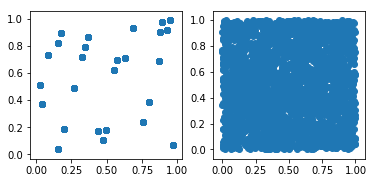

In [29]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.scatter(Nsimple[Even],Nsimple[~Even])
ax2.scatter(Nrand48[Even],Nrand48[~Even])

# Calcular los momentos de la distribucion